### 一、数据导入与统计分析

- 数据导入

In [1]:
import pandas as pd

file = "adult.data"
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

field = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
                "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

data = pd.read_csv(file, names=field, sep=',\s', engine='python')
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- 不同收入类别的数量均衡性分析

In [2]:
income_distribution = data['income'].value_counts()
income_distribution

<=50K    24720
>50K      7841
Name: income, dtype: int64

- 空值分布分析

In [3]:
null_values = data.isnull().sum()
null_values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

- 异常值分布分析

In [4]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- 特征相关性分析


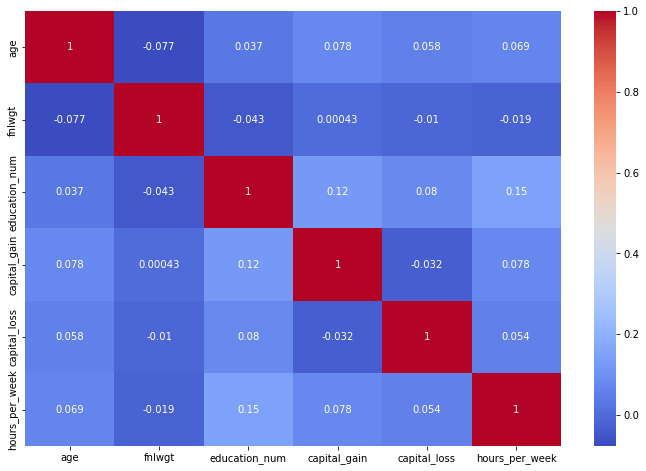

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 二、数据预处理与特征工程

- 处理空值

In [6]:
# 处理空值，使用众数填充
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())

# 检查空值分布
print("处理空值 - 每列空值数量:")
data.isnull().sum()

处理空值 - 每列空值数量:


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

- 异常值处理

In [7]:
# 使用IQR方法处理异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 处理数值列中的异常值
for column in data.select_dtypes(include=['number']).columns:
    data = remove_outliers(data, column)

# 检查处理后的数据描述
print("异常值处理 - 数据描述:")
data.describe()

异常值处理 - 数据描述:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,19004.000000,19004.000000,19004.000000,19004.0,19004.0,19004.000000
mean,38.049095,180729.746369,10.246317,0.0,0.0,41.470690
std,12.025270,87103.790068,2.152063,0.0,0.0,3.950176
min,17.000000,14878.000000,5.000000,0.0,0.0,33.000000
25%,28.000000,117500.500000,9.000000,0.0,0.0,40.000000
50%,37.000000,176839.000000,10.000000,0.0,0.0,40.000000
75%,47.000000,228972.250000,12.000000,0.0,0.0,40.000000
max,78.000000,416415.000000,16.000000,0.0,0.0,52.000000


- 标签转换

In [8]:
# 将目标变量转换为二值
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# 查看收入类别的分布
print("标签转换 - 收入类别分布:")
data['income'].value_counts()


标签转换 - 收入类别分布:


0    14982
1     4022
Name: income, dtype: int64

- 类别特征编码

In [9]:
from sklearn.preprocessing import LabelEncoder

# 对类别特征进行Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 查看编码后数据
print("类别特征编码数据:")
data

类别特征编码数据:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,38,0
7,52,6,209642,8,9,2,4,0,4,1,0,0,45,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,4,321865,9,14,2,4,0,4,1,0,0,40,38,1
32555,22,4,310152,11,10,4,11,1,4,1,0,0,40,38,0
32556,27,4,257302,4,12,2,13,5,4,0,0,0,38,38,0
32557,40,4,154374,8,9,2,7,0,4,1,0,0,40,38,1


- 数值特征标准化

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.select_dtypes(include=['number']).columns] = scaler.fit_transform(data.select_dtypes(include=['number']))

print("数值特征标准化数据:")
data

数值特征标准化数据:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2,-0.004083,0.095424,0.400869,0.176239,-0.579142,-1.667911,-0.101106,-0.269342,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,-0.518127
3,1.243323,0.095424,0.619866,-2.340644,-1.508507,-0.353883,-0.101106,-0.893938,-1.892919,0.702953,0.0,0.0,-0.37232,0.276528,-0.518127
4,-0.835687,0.095424,1.810293,-0.542870,1.279589,-0.353883,0.850206,2.229045,-1.892919,-1.422571,0.0,0.0,-0.37232,-4.173888,-0.518127
5,-0.087243,0.095424,1.192313,0.535794,1.744272,-0.353883,-0.576762,2.229045,0.407441,-1.422571,0.0,0.0,-0.37232,0.276528,-0.518127
7,1.160163,1.560834,0.331938,0.176239,-0.579142,-0.353883,-0.576762,-0.893938,0.407441,0.702953,0.0,0.0,0.89348,0.276528,1.930029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,1.243323,0.095424,1.620354,0.535794,1.744272,-0.353883,-0.576762,-0.893938,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,1.930029
32555,-1.334649,0.095424,1.485879,1.254904,-0.114459,0.960145,1.088034,-0.269342,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,-0.518127
32556,-0.918847,0.095424,0.879115,-1.261980,0.814906,-0.353883,1.563690,2.229045,0.407441,-1.422571,0.0,0.0,-0.87864,0.276528,-0.518127
32557,0.162238,0.095424,-0.302587,0.176239,-0.579142,-0.353883,0.136722,-0.893938,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,1.930029


- 特征选择与转换

In [11]:
# 选择与收入相关的特征
selected_features = ['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']
X = data[selected_features]
y = data['income']

# 查看选定特征的前5行数据
print("特征选择数据:")
X

特征选择数据:


,age,education_num,hours_per_week,capital_gain,capital_loss
2,-0.004083,-0.579142,-0.37232,0.0,0.0
3,1.243323,-1.508507,-0.37232,0.0,0.0
4,-0.835687,1.279589,-0.37232,0.0,0.0
5,-0.087243,1.744272,-0.37232,0.0,0.0
7,1.160163,-0.579142,0.89348,0.0,0.0
...,...,...,...,...,...
32554,1.243323,1.744272,-0.37232,0.0,0.0
32555,-1.334649,-0.114459,-0.37232,0.0,0.0
32556,-0.918847,0.814906,-0.87864,0.0,0.0
32557,0.162238,-0.579142,-0.37232,0.0,0.0


- 分桶处理（如对年龄进行分桶）

In [12]:
# 对年龄进行分桶
data['age_bin'] = pd.cut(data['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Old'])
le_age_bin = LabelEncoder()
data['age_bin'] = le_age_bin.fit_transform(data['age_bin'])

# 查看分桶后的前5行数据
print("年龄分桶数据:")
data[['age', 'age_bin']]

年龄分桶数据:


,age,age_bin
2,-0.004083,1
3,1.243323,0
4,-0.835687,1
5,-0.087243,1
7,1.160163,0
...,...,...
32554,1.243323,0
32555,-1.334649,1
32556,-0.918847,1
32557,0.162238,0


- 连续值与离散值的转换

In [13]:
# 将hours_per_week进行离散化处理
data['hours_per_week_bin'] = pd.cut(data['hours_per_week'], bins=[0, 25, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extensive'])
le_hours_per_week_bin = LabelEncoder()
data['hours_per_week_bin'] = le_hours_per_week_bin.fit_transform(data['hours_per_week_bin'])

# 查看转换后的前5行数据
print("工作时间离散化数据:")
data[['hours_per_week', 'hours_per_week_bin']]

工作时间离散化数据:


,hours_per_week,hours_per_week_bin
2,-0.37232,1
3,-0.37232,1
4,-0.37232,1
5,-0.37232,1
7,0.89348,0
...,...,...
32554,-0.37232,1
32555,-0.37232,1
32556,-0.87864,1
32557,-0.37232,1


- 总结数据预处理与特征工程

In [14]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bin,hours_per_week_bin
2,-0.004083,0.095424,0.400869,0.176239,-0.579142,-1.667911,-0.101106,-0.269342,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,-0.518127,1,1
3,1.243323,0.095424,0.619866,-2.340644,-1.508507,-0.353883,-0.101106,-0.893938,-1.892919,0.702953,0.0,0.0,-0.37232,0.276528,-0.518127,0,1
4,-0.835687,0.095424,1.810293,-0.542870,1.279589,-0.353883,0.850206,2.229045,-1.892919,-1.422571,0.0,0.0,-0.37232,-4.173888,-0.518127,1,1
5,-0.087243,0.095424,1.192313,0.535794,1.744272,-0.353883,-0.576762,2.229045,0.407441,-1.422571,0.0,0.0,-0.37232,0.276528,-0.518127,1,1
7,1.160163,1.560834,0.331938,0.176239,-0.579142,-0.353883,-0.576762,-0.893938,0.407441,0.702953,0.0,0.0,0.89348,0.276528,1.930029,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,1.243323,0.095424,1.620354,0.535794,1.744272,-0.353883,-0.576762,-0.893938,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,1.930029,0,1
32555,-1.334649,0.095424,1.485879,1.254904,-0.114459,0.960145,1.088034,-0.269342,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,-0.518127,1,1
32556,-0.918847,0.095424,0.879115,-1.261980,0.814906,-0.353883,1.563690,2.229045,0.407441,-1.422571,0.0,0.0,-0.87864,0.276528,-0.518127,1,1
32557,0.162238,0.095424,-0.302587,0.176239,-0.579142,-0.353883,0.136722,-0.893938,0.407441,0.702953,0.0,0.0,-0.37232,0.276528,1.930029,0,1


### 三、分类模型的构建、训练和评估

- 分离特征和标签

In [15]:
# 分离特征和标签
X = data.drop(['income', 'age', 'hours_per_week'], axis=1)  # 去除原始列，只保留处理后的列
y = data['income'].astype(int)  # 强制转换为整数型

# 检查特征和标签
print("分离特征和标签:")
print(X)
print("分离特征和标签:")
y

分离特征和标签:
       workclass    fnlwgt  education  education_num  marital_status  \
2       0.095424  0.400869   0.176239      -0.579142       -1.667911   
3       0.095424  0.619866  -2.340644      -1.508507       -0.353883   
4       0.095424  1.810293  -0.542870       1.279589       -0.353883   
5       0.095424  1.192313   0.535794       1.744272       -0.353883   
7       1.560834  0.331938   0.176239      -0.579142       -0.353883   
...          ...       ...        ...            ...             ...   
32554   0.095424  1.620354   0.535794       1.744272       -0.353883   
32555   0.095424  1.485879   1.254904      -0.114459        0.960145   
32556   0.095424  0.879115  -1.261980       0.814906       -0.353883   
32557   0.095424 -0.302587   0.176239      -0.579142       -0.353883   
32558   0.095424 -0.330875   0.176239      -0.579142        2.274172   

       occupation  relationship      race       sex  capital_gain  \
2       -0.101106     -0.269342  0.407441  0.702953      

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: income, Length: 19004, dtype: int32

- 拆分数据集

In [16]:
from sklearn.model_selection import train_test_split

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的大小
print("拆分数据集 - 训练集大小:", X_train.shape)
print("拆分数据集 - 测试集大小:", X_test.shape)

拆分数据集 - 训练集大小: (15203, 14)
拆分数据集 - 测试集大小: (3801, 14)


- 创建预处理和分类器管道

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# 定义数值和类别特征
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 创建预处理步骤
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 创建管道
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# 输出管道步骤
print("创建管道 - 步骤:")
print(clf)

创建管道 - 步骤:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'native_country', 'age_bin', 'hours_per_week_bin'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier())])


- 训练模型

In [18]:
# 训练模型
clf.fit(X_train, y_train)

# 输出训练结果
print("训练模型 - 完成")

训练模型 - 完成


- 预测并评估模型

In [19]:
from sklearn.metrics import classification_report, accuracy_score

# 预测
y_pred = clf.predict(X_test)

# 输出分类报告
print("预测并评估模型 - 分类报告:")
print(classification_report(y_test, y_pred))

# 输出准确率
print("预测并评估模型 - 准确率:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

预测并评估模型 - 分类报告:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3019
           1       0.56      0.49      0.52       782

    accuracy                           0.82      3801
   macro avg       0.72      0.69      0.70      3801
weighted avg       0.81      0.82      0.81      3801

预测并评估模型 - 准确率:
Accuracy: 0.8153117600631413
